In [2]:
%pip install -r "requirements.txt"

  Obtaining dependency information for tiktoken from https://files.pythonhosted.org/packages/6f/07/c67ad1724b8e14e2b4c8cca04b15da158733ac60136879131db05dda7c30/tiktoken-0.9.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/893.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/893.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/893.9 kB 435.7 kB/s eta 0:00:02
   ---- ---------------------------------- 92.2/893.9 kB 871.5 kB/s eta 0:00:01
   --------- ------------------------------ 204.8/893.9 kB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 307.2/893.9 kB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 491.5/893.9 kB 2.4 MB/s eta 0:00:01
   -------------------------------------- - 860.2/893.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 893.9/893.9 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("data/customer_service/train.csv")

# Data Exploration 
Checked the overall information about the dataset

In [48]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
 11  conversation_length          970 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 91.1+ KB


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,conversation_length
count,970,970,970,970,970,970,970,970,970,970,970,970.000000
unique,6,40,109,109,3,3,50,3,3,3,968,NaN
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Bp Monitor,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!",NaN
freq,277,92,17,17,542,454,26,472,490,490,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.289691
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.653613
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1791.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2091.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2471.750000


Checked the percantages of the different sentiments. It is observed that positive sentiments are very rare.

In [49]:
df["customer_sentiment"].value_counts(normalize=True) * 100

customer_sentiment
neutral     55.876289
negative    42.371134
positive     1.752577
Name: proportion, dtype: float64

Checked the issue complexity vs customer sentiment. It was seen that negative sentiment increases as the issue complexity increases.

In [50]:
pd.crosstab(df["issue_complexity"], df["customer_sentiment"])

customer_sentiment,negative,neutral,positive
issue_complexity,,,
high,39,40,3
less,197,268,7
medium,175,234,7


Similarly, agent experience level vs customer sentiment is examined. Suprisingly, the experience level doesn't have a big affect on the customer sentiment.

In [51]:
pd.crosstab(df["agent_experience_level"], df["customer_sentiment"])

customer_sentiment,negative,neutral,positive
agent_experience_level,,,
experienced,147,188,4
inexperienced,47,93,1
junior,217,261,12


In [52]:
complexity_sentiment = df.groupby("issue_complexity")["customer_sentiment"].value_counts(normalize=True).unstack() * 100
print(complexity_sentiment)
print("\n")
experience_sentiment = df.groupby("agent_experience_level")["customer_sentiment"].value_counts(normalize=True).unstack() * 100
print(experience_sentiment)

customer_sentiment   negative    neutral  positive
issue_complexity                                  
high                47.560976  48.780488  3.658537
less                41.737288  56.779661  1.483051
medium              42.067308  56.250000  1.682692


customer_sentiment       negative    neutral  positive
agent_experience_level                                
experienced             43.362832  55.457227  1.179941
inexperienced           33.333333  65.957447  0.709220
junior                  44.285714  53.265306  2.448980


The lengths of the conversations are inspected. It was seen that the conversations are longer when the customer sentiment is negative.

In [53]:
df["conversation_length"] = df["conversation"].apply(len)
df.groupby("customer_sentiment")["conversation_length"].mean()

customer_sentiment
negative    2433.912409
neutral     1973.374539
positive    1732.588235
Name: conversation_length, dtype: float64

# Data preparation 
Customer service data is preprocessed and saved as .npy files. Here, only the replies given by the users excluding the last reply are taken and saved as X_train and X_val. Also, their corresponding labels (sentiments) are encoded into integer and they are saved as y_train and y_val.

In [1]:
!python data/customer_service/prepare.py

Train dataset size: 773
Validation dataset size: 194
Test dataset size: 30


# Weights And Biases Setup

In [2]:
import wandb
import os
wandb.login(key=os.getenv("WANDB_API"))

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ahmetbekcan (DI725-2299436). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\USER\_netrc


True

# Training the model

In [3]:
!python train.py config/train_sentiment_analysis.py --compile=False

Overriding config with config/train_sentiment_analysis.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-sentiment-analysis'
eval_interval = 100  # decreased to prevent overfitting
eval_iters = 200
log_interval = 50 

always_save_checkpoint = False

wandb_log = True
wandb_project = 'sentiment-analysis'
wandb_run_name = 'mini-gpt-train'

dataset = 'customer_service'
gradient_accumulation_steps = 1
batch_size = 8
block_size = 256

sentiment_classifier = True # it will change the model implementation

n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-4 # decreased since dataset is small
max_iters = 2000
lr_decay_iters = 2000 
min_lr = 1e-5  # learning_rate / 10 usually
beta2 = 0.99 

warmup_iters = 100

# on macbook also add
# device = 'cpu'  # run on cpu only
# compile = False # do not torch compile the model

Overriding: compile = False
tokens per iteration will be: 2,048
Initializing a new

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ahmetbekcan (DI725-2299436). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in c:\Users\USER\Desktop\DI725-Assignment-1\wandb\run-20250406_205828-2a1snlnp
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run mini-gpt-train
wandb:  View project at https://wandb.ai/DI725-2299436/sentiment-analysis
wandb:  View run at https://wandb.ai/DI725-2299436/sentiment-analysis/runs/2a1snlnp
c:\Users\USER\Desktop\DI725-Assignment-1\model.py:64: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)


Overriding config with config/train_sentiment_analysis.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-sentiment-analysis'
eval_interval = 100  # decreased to prevent overfitting
eval_iters = 200
log_interval = 50 

always_save_checkpoint = False

wandb_log = True
wandb_project = 'sentiment-analysis'
wandb_run_name = 'mini-gpt-train'

dataset = 'customer_service'
gradient_accumulation_steps = 1
batch_size = 8
block_size = 256

sentiment_classifier = True # it will change the model implementation

n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-4 # decreased since dataset is small
max_iters = 2000
lr_decay_iters = 2000 
min_lr = 1e-5  # learning_rate / 10 usually
beta2 = 0.99 

warmup_iters = 100

# on macbook also add
# device = 'cpu'  # run on cpu only
# compile = False # do not torch compile the model

Overriding: compile = False
tokens per iteration will be: 2,048
Initializing a new

wandb: Currently logged in as: ahmetbekcan (DI725-2299436). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in c:\Users\USER\Desktop\DI725-Assignment-1\wandb\run-20250406_205852-lv0h24jc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run mini-gpt-train
wandb:  View project at https://wandb.ai/DI725-2299436/sentiment-analysis
wandb:  View run at https://wandb.ai/DI725-2299436/sentiment-analysis/runs/lv0h24jc
c:\Users\USER\Desktop\DI725-Assignment-1\model.py:64: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)


# Evaluating the model

## Helper Functions

Two functions are written to evaluate the model and load the checkpoints as follows

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from model import GPT
from torch.nn.utils.rnn import pad_sequence
from model import GPT, GPTConfig

def evaluate_model(model: GPT, X_test_path, y_test_path, sent_to_int, device='cpu'):
    # Load the test data (X_test and y_test) using pickle
    with open(X_test_path, 'rb') as f:
        X_test = pickle.load(f)
    
    with open(y_test_path, 'rb') as f:
        y_test = pickle.load(f)
    
    # Ensure the model is in evaluation mode
    model.eval()

    # Pad sequences to ensure uniform length
    padded_X_test = pad_sequence([torch.tensor(seq, dtype=torch.long) for seq in X_test], batch_first=True, padding_value=0)
    block_size = model.config.block_size
    # If the sequences are longer than block_size, truncate them
    padded_X_test = padded_X_test[:, :block_size]
    
    # Move data to the correct device (CPU or GPU)
    X_test_tensor = padded_X_test.to(device)  # Shape: (num_samples, seq_len)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)  # Shape: (num_samples,)
    
    # Make predictions
    with torch.no_grad():
        logits, _ = model(X_test_tensor)  # Assuming output shape is (num_samples, seq_len, num_classes)
        logits = logits[:, -1, :]  # Only take the logits for the last token (sentiment prediction)
        
        # Apply softmax to get probabilities and then get the predicted class
        probs = torch.softmax(logits, dim=-1)
        predictions = torch.argmax(probs, dim=-1)
    
    # Convert predictions to numpy arrays for further analysis
    predictions_np = predictions.cpu().numpy()
    
    # Calculate success rate
    correct_predictions = (predictions_np == y_test_tensor.cpu().numpy()).sum()
    total_predictions = len(y_test)
    success_rate = correct_predictions / total_predictions * 100
    
    print(f"Success Rate: {success_rate:.2f}%")
    
    f1 = f1_score(y_test_tensor.cpu().numpy(), predictions_np, average='weighted')
    print(f"F1-Score: {f1:.2f}")

    int_to_sentiment = {v: k for k, v in sent_to_int.items()}

    y_test_labels = [int_to_sentiment[i] for i in y_test]
    pred_labels = [int_to_sentiment[i] for i in predictions_np]

    cm = confusion_matrix(y_test_labels, pred_labels, labels=list(sent_to_int.keys()))

    sns.heatmap(cm, annot=True, fmt='d', xticklabels=sent_to_int.keys(), yticklabels=sent_to_int.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return success_rate, cm, f1

def load_model_from_checkpoint(ckpt_path, device='cpu'):
    # Load the checkpoint
    checkpoint = torch.load(ckpt_path, map_location=device)
    
    # Get the saved model configuration
    model_args = checkpoint['model_args']
    
    # Initialize the model with the saved configuration
    config = GPTConfig(**model_args)  # Use the saved arguments to create the model configuration
    model = GPT(config).to(device)  # Reinitialize the model
    
    # Load the model's state dictionary from the checkpoint
    model.load_state_dict(checkpoint['model'])
    
    # Set the model to evaluation mode (optional, for inference)
    model.eval()
    
    print(f"Model loaded from checkpoint: {ckpt_path}")
    
    return model

## Evaluating Trained Model

number of parameters: 10.66M
Model loaded from checkpoint: out-sentiment-analysis/ckpt.pt
Success Rate: 33.33%


c:\Users\USER\Desktop\DI725-Assignment-1\model.py:64: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)


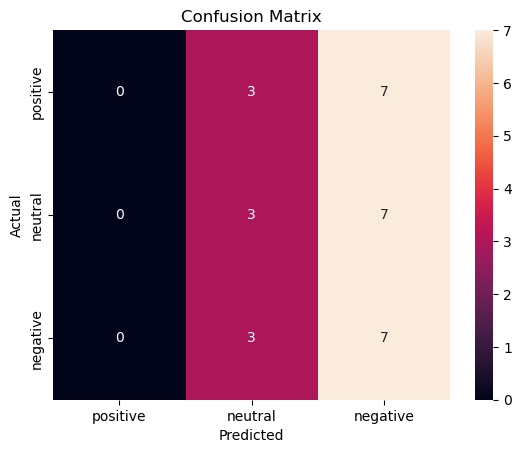

(33.33333333333333,
 array([[0, 3, 7],
        [0, 3, 7],
        [0, 3, 7]], dtype=int64))

In [5]:
device = "cuda" if torch.cuda.is_available else "cpu"
model = load_model_from_checkpoint('out-sentiment-analysis/ckpt.pt', device=device)
with open("data/customer_service/meta.pkl", 'rb') as f:
    meta = pickle.load(f)
sent_to_int = meta["sentiment_to_int"]
evaluate_model(model, "data/customer_service/X_test.bin","data/customer_service/y_test.bin", sent_to_int, device=device)

# Fine-tuning the model

This time the data is prepared with a different tokenizer.

In [4]:
!python data/customer_service_finetune/prepare.py

Train dataset size: 773
Validation dataset size: 194
Test dataset size: 30


In [7]:
!python train.py config/finetune_sentiment_analysis.py --compile=False

Overriding config with config/finetune_sentiment_analysis.py:
out_dir = 'out-sentiment-analysis-finetune'

always_save_checkpoint = False

wandb_log = True
wandb_project = 'sentiment-analysis'
wandb_run_name = 'mini-gpt-finetune'

dataset = 'customer_service_finetune'
init_from = 'gpt2'

# only save checkpoints if the validation loss improves
always_save_checkpoint = False

# the number of examples per iter:
batch_size = 1
gradient_accumulation_steps = 32
max_iters = 200

# finetune at constant LR
learning_rate = 3e-5
decay_lr = False
sentiment_classifier = True

eval_interval = 100  # decreased to prevent overfitting
eval_iters = 200
log_interval = 50 
Overriding: compile = False
tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
model is loaded with sentiment classifier is True
number of parameters: 123.66M
num decayed parameter 

wandb: Currently logged in as: ahmetbekcan (DI725-2299436). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in c:\Users\USER\Desktop\DI725-Assignment-1\wandb\run-20250407_002320-1qqssqmn
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run mini-gpt-finetune
wandb:  View project at https://wandb.ai/DI725-2299436/sentiment-analysis
wandb:  View run at https://wandb.ai/DI725-2299436/sentiment-analysis/runs/1qqssqmn
c:\Users\USER\Desktop\DI725-Assignment-1\model.py:64: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)


# Evaluating the Finetuned Model

In [8]:
device = "cuda" if torch.cuda.is_available else "cpu"
model = load_model_from_checkpoint('out-sentiment-analysis-finetune/ckpt.pt', device=device)

number of parameters: 123.66M
Model loaded from checkpoint: out-sentiment-analysis-finetune/ckpt.pt


c:\Users\USER\Desktop\DI725-Assignment-1\model.py:64: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)


Success Rate: 36.67%


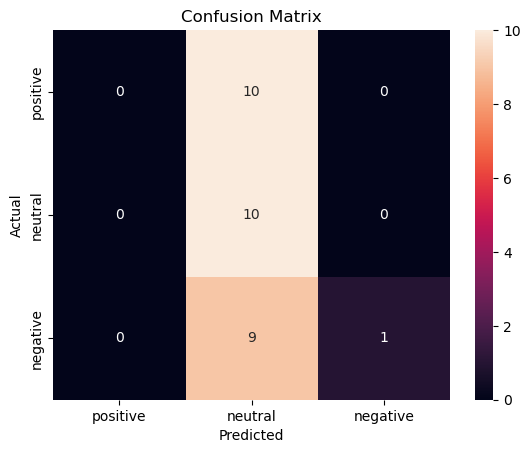

(36.666666666666664,
 array([[ 0, 10,  0],
        [ 0, 10,  0],
        [ 0,  9,  1]], dtype=int64))

In [9]:
with open("data/customer_service/meta.pkl", 'rb') as f:
    meta = pickle.load(f)
sent_to_int = meta["sentiment_to_int"]
evaluate_model(model, "data/customer_service/X_test.bin","data/customer_service/y_test.bin", sent_to_int, device=device)